from google colab import files #匯入套件

import pandas as pd

upload = files.upload() #開啟上傳介面並載入

data = pd.read_csv("剛剛上傳的檔案名稱")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/MyDrive/112-2 LATIA/week3-0305/") # 切換目錄
!ls -l "/content/gdrive/MyDrive/112-2 LATIA/week3-0305/" # 列出目錄下的檔案
#!ls -l "自行填寫正確的路徑"

Mounted at /content/gdrive/
total 111
-rw------- 1 root root 92484 Mar  5 06:36 112_student.csv
-rw------- 1 root root 20934 Mar  9 13:46 「week3_demo_ipynb」的副本.ipynb


In [2]:
import pandas as pd

#csv_file = './112_student.csv'
csv_file ='./112_student.csv'

#columns = [
#    "學年度","學校代碼","學校名稱","日間∕進修別","等級別","總計","男生計",
#    "女生計","一年級男","一年級女","二年級男","二年級女","三年級男","三年級女",
#    "四年級男","四年級女","五年級男","五年級女","六年級男","六年級女",
#    "七年級男","七年級女","延修生男","延修生女","縣市名稱","體系別"
#]
df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head())

#查看資料欄位資訊
print(df.info())

#查看資料的統計學資訊描述
#print(df.describe(include='all'))

   學年度  學校代碼    學校名稱 日間∕進修別   等級別    總計   男生計   女生計  一年級男  一年級女  ...  五年級男  \
0  112     1  國立政治大學    D 日  D 博士   921   517   404    86    69  ...    63   
1  112     1  國立政治大學    D 日  M 碩士  4231  1835  2396   598   809  ...     2   
2  112     1  國立政治大學    N 職  M 碩士  1903   938   965   262   304  ...    77   
3  112     1  國立政治大學    D 日  B 學士  9763  3928  5835   906  1349  ...     0   
4  112     2  國立清華大學    D 日  D 博士  1636  1131   505   206    93  ...   140   

   五年級女  六年級男  六年級女  七年級男  七年級女  延修生男  延修生女    縣市名稱   體系別  
0    52    68    37    66    50     0     0  30 臺北市  1 一般  
1     1     1     0     0     0     0     0  30 臺北市  1 一般  
2    57     0     0     0     0     0     0  30 臺北市  1 一般  
3     0     0     0     0     0   316   499  30 臺北市  1 一般  
4    60   110    50   115    56     0     0  18 新竹市  1 一般  

[5 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  --

# 1.哪間大專院校有最多的學士生

step1: 取出想要查看的欄位，並印出此資料集共有多少筆紀錄 (len)

step2: 篩選等級別為"B 學士"的DataFrame，並印出有招生學士學制的學校數量

step3: 依據"總計"從大到小排序並印出結果 (sort_values, by, ascending)

In [40]:
# 請在"填空"處，輸入所需要的指令或參數

df1 = df[['等級別','總計','學校名稱']] # 取出想要觀看的欄位
print("本資料集共有", len(df1), "筆紀錄")

df1_1 = df1[df1['等級別'] == 'B 學士']
print("有招生學士學制的學校數量為", len(df1_1), "\n")
df1_1_sorted = df1_1.sort_values(by='總計', ascending=False)
print("112學年度在籍的學士生最多人數之學校為", df1_1_sorted.head(1)["學校名稱"].values)

本資料集共有 764 筆紀錄
有招生學士學制的學校數量為 97 

112學年度在籍的學士生最多人數之學校為 ['淡江大學']


# 2. 國立？所；私立？所

step1: 建立空字串 (lsit=[])

step2: 建立for迴圈，配合if else條件，取出國立與私立

step3: 新增「公私立」column在DataFrame中 (df['公私立'])

step4: 篩選掉重複的學校代碼資料 (drop_duplicates)

step5: 計算公立與私立學校的筆數，並印出結果 (value_counts)

In [39]:
type_list = [] # 建立空字串

for i in df['學校名稱']:
    if ('國立' in i) or ('市立' in i):
        type_list.append('公立')
    else:
        type_list.append('私立')

df['公私立'] = type_list # 將 Dataframe 新增「公私立」column

df2 = df.drop_duplicates('學校代碼')
count = df2['公私立'].value_counts()

print(df2)
print(f"本資料集共收集了 {len(df2)} 所學校，其中公立：{count['公立']} 所；私立：{count['私立']} 所。")

     學年度  學校代碼        學校名稱 日間∕進修別   等級別    總計   男生計   女生計  一年級男  一年級女  ...  \
0    112     1      國立政治大學    D 日  D 博士   921   517   404    86    69  ...   
4    112     2      國立清華大學    D 日  D 博士  1636  1131   505   206    93  ...   
9    112     3      國立臺灣大學    D 日  D 博士  3654  2454  1200   431   215  ...   
13   112     4    國立臺灣師範大學    D 日  D 博士  1337   630   707   106   127  ...   
17   112     5      國立成功大學    D 日  D 博士  1888  1228   660   219   136  ...   
..   ...   ...         ...    ...   ...   ...   ...   ...   ...   ...  ...   
753  112  1289  育英醫護管理專科學校    D 日  5 五專  1833   200  1633    39   343  ...   
754  112  1291  聖母醫護管理專科學校    D 日  2 二專     2     2     0     0     0  ...   
757  112  1292  新生醫護管理專科學校    N 修  2 二專    79    12    67     7    37  ...   
759  112  1293  崇仁醫護管理專科學校    D 日  5 五專  3017   460  2557   112   515  ...   
760  112  3002      臺北市立大學    D 日  D 博士   208    94   114    17    11  ...   

     六年級女  七年級男  七年級女  延修生男  延修生女    縣市名稱   體系別  縣市名  區域  公私立  

# 3. 各等級別學制共有？所

step1: 篩選掉重複的學校名稱與等級別 (drop_duplicates, subset)

step2: 計算出等級別的筆數 (value_counts)

step3: 建立等級別的字串，並找出其類別 (unique)

step4: 使用for迴圈，依序列出所有等級別學制的學校數量 (count)

In [41]:
df3 = df.drop_duplicates(subset=['學校名稱','等級別'])
count = df3['等級別'].value_counts()
degree_list = list(df['等級別'].unique())

print(f"本資料集總共收集了 {len(set(df['學校名稱']))} 所學校，各等級學制當中：")
for degree in degree_list:
  print(f"一共有 {count[degree]} 所學校，有招收 {degree}。")

本資料集總共收集了 145 所學校，各等級學制當中：
一共有 84 所學校，有招收 D 博士。
一共有 130 所學校，有招收 M 碩士。
一共有 67 所學校，有招收 B 學士。
一共有 1 所學校，有招收 X 4+X。
一共有 71 所學校，有招收 C 二技。
一共有 66 所學校，有招收 B 四技。
一共有 46 所學校，有招收 5 五專。
一共有 2 所學校，有招收 5 七年。
一共有 46 所學校，有招收 2 二專。
一共有 1 所學校，有招收 C 二年制。


In [42]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-12 07:50:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.102, 172.253.115.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-12 07:50:37--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  41.4MB/s    in 0.5s    

2024-03-12 07

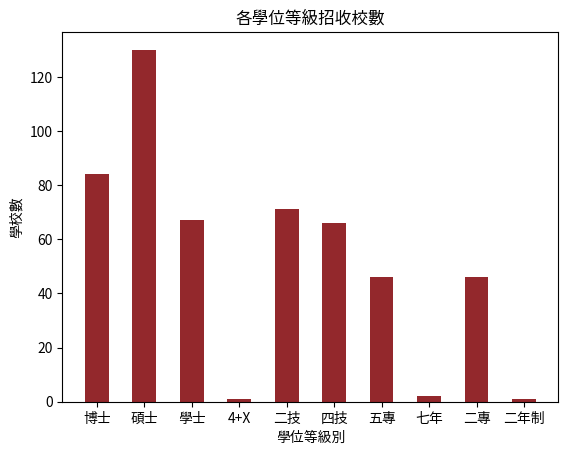

In [43]:
# 目的：是從一個DataFrame df 中選取特定的學校名稱和等級別的組合，計算每個等級別的學校數量，然後將結果以長條圖的形式顯示。

# Line30說明，df3_1 = df.drop_duplicates(subset=['學校名稱', '等級別'])
# drop_duplicates() 函數用於刪除重複的行。
# subset=['學校名稱', '等級別'] 指定以哪些列的值作為唯一性的判斷標準。這裡使用了學校名稱和等級別作為判斷依據。結果將儲存在 df3_1 中。

# Line31說明，count = df3_1['等級別'].value_counts()
# value_counts() 函數用於計算每個唯一值的出現次數。
# 這裡計算了 df3_1 中每個不同等級別的出現次數，並將結果儲存在 count 中。

# Line32說明，listx = [x[2:] for x in list(df['等級別'].unique())]
# df['等級別'].unique() 用於取得等級別列中的唯一值。
# 對於每個唯一值，取其索引從第三個字元開始的子字串，並將結果儲存在 listx 中。這是為了去掉等級別中的前綴，只保留等級別的描述性部分。

# Line33說明，listy = [count[x] for x in list(df['等級別'].unique())]
# 對於 df['等級別'].unique() 中的每個唯一值，從 count 字典中取得相應的計數，並將結果儲存在 listy 中。這樣就建立了一個與 listx 對應的計數列表。

# Line35說明，plt.bar(listx, listy, width=0.5, color='#93282c')
# 使用 plt.bar() 函數繪製長條圖，其中 listx 是 x 軸上的刻度，listy 是對應的 y 軸數值。
# width=0.5 設置長條形的寬度為0.5。
# color='#93282c' 設置長條形的顏色為深紅色。

# 其繪他圖相關設置：
# Line36說明，plt.title('各學位等級招收校數') 設置圖表的標題。
# Line37說明，plt.xlabel('學位等級別') 設置 x 軸的標籤。
# Line38說明，plt.ylabel('學校數') 設置 y 軸的標籤。
# Line39說明，plt.show() 顯示繪製的圖形。


df3_1 = df.drop_duplicates(subset=['學校名稱', '等級別'])
count = df3_1['等級別'].value_counts()
listx = [x[2:] for x in list(df['等級別'].unique())]
listy = [count[x] for x in list(df['等級別'].unique())]

plt.bar(listx, listy, width=0.5, color='#93282c')
plt.title('各學位等級招收校數')
plt.xlabel('學位等級別')
plt.ylabel('學校數')
plt.show()


# Q1台師大女生總人數

In [ ]:
ntnu_df = df[df['學校名稱'] == '國立臺灣師範大學']
total_females = ntnu_df['女生計'].sum()
print(f"國立臺灣師範大學的女性學生數量為：{total_females}")


國立臺灣師範大學的女性學生數量為：9462


# Q2台師大男生延修人數

In [ ]:
df4 = df[df['學校名稱'] == '國立臺灣師範大學']
total = df4['延修生男'].sum()
print(f"國立臺灣師範大學的男性延修數量為：{total}")

國立臺灣師範大學的男性延修數量為：304


# Q3台大總學生數

In [ ]:
ntu_df = df[df['學校名稱'] == '國立臺灣大學']
total_students = ntu_df['總計'].sum()
print(f"國立臺灣大學的總學生數量為：{total_students}")

國立臺灣大學的總學生數量為：33882


# 4. 各縣市分別有？所，位於新北市的大專院校總共有幾所

In [44]:
# 目的是從一個DataFrame df 中提取縣市名稱的資訊，並基於這些資訊進行統計分析和列印。

# Line37說明，city_list = []
# 創建一個空列表 city_list，用於儲存從 df['縣市名稱'] 中提取的縣市名。

# Line39-40說明，for i in df['縣市名稱']: city_list.append(i[3:])：
# 這是一個for循環，拜訪DataFrame df 中的每一個縣市名稱。
# i[3:] 表示取每個縣市名稱字串的第3個字元到最後一個字元的子字串。這樣做的目的可能是去掉縣市名稱中的前綴（例如縣市編碼）。
# 將處理後的縣市名添加到 city_list 中。

# Line42說明，df['縣市名'] = city_list
# 將處理後的縣市名稱列表 city_list 添加到 DataFrame df 中，建立一個新的列名為 '縣市名'。

# Line43說明，df4 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df4 中。確保每個學校代碼僅出現一次。

# Line44說明，count = df4['縣市名'].value_counts()
# 使用 value_counts() 函數計算 df4['縣市名'] 列中每個唯一值的出現次數，並將結果儲存在 count 中。

# Line45說明，city_list = df4['縣市名'].unique()
# 使用 unique() 函數獲取 df4['縣市名'] 列中的唯一值，並將結果儲存在 city_list 中。

# Line46說明，print(f"本資料集共收集了 {len(df4)} 學校，其中：")
# 印出一條信息，顯示共收集了多少所學校。

# Line48-49說明，for city in city_list: print(f"{city}有 {count[city]} 所")
# 拜訪 city_list 中的每個縣市名稱，並印出該縣市下的學校數量。count[city] 從 count 中取得對應的學校數。

# Line51說明，newtaipei = df4[df4['縣市名'] == '新北市']：
# 建立一個新的DataFrame newtaipei，其中僅包含縣市名為 '新北市' 的行。

# Line53說明，print('\n',newtaipei['縣市名'].value_counts())：
# 印出縣市名為 '新北市' 的學校數量。這是使用 value_counts() 函數計算新DataFrame newtaipei 中縣市名稱為 '新北市' 的出現次數。



city_list = []

for i in df['縣市名稱']:
    city_list.append(i[3:])

df['縣市名'] = city_list
df4 = df.drop_duplicates('學校代碼')
count = df4['縣市名'].value_counts()
city_list = df4['縣市名'].unique()
print(f"本資料集共收集了 {len(df4)} 學校，其中：")

for city in city_list:
    print(f"{city}有 {count[city]} 所")

newtaipei = df4[df4['縣市名'] == '新北市']
print('\n') #斷行的用途
print(newtaipei['縣市名'].value_counts())

本資料集共收集了 145 學校，其中：
臺北市有 24 所
新竹市有 5 所
臺南市有 13 所
臺中市有 17 所
桃園市有 12 所
高雄市有 15 所
基隆市有 3 所
嘉義縣有 4 所
彰化縣有 4 所
新北市有 20 所
嘉義市有 2 所
花蓮縣有 4 所
南投縣有 2 所
雲林縣有 3 所
屏東縣有 5 所
臺東縣有 2 所
宜蘭縣有 3 所
苗栗縣有 3 所
澎湖縣有 1 所
金門縣有 1 所
新竹縣有 2 所


新北市    20
Name: 縣市名, dtype: int64


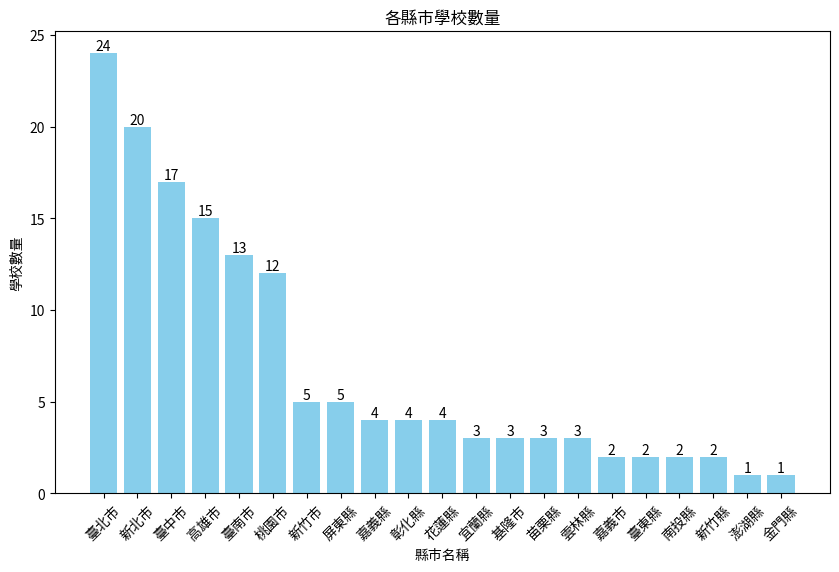

In [6]:
# 目的：繪製一個長條圖，顯示各個縣市的學校數量。

# Line38說明，plt.figure(figsize=(10, 6))
# 創建一個新的圖形，設置尺寸為寬度為10英寸，高度為6英寸。這樣做是為了確保長條圖在輸出時有適當的大小。

# Line39說明，bars = plt.bar(count.index, count.values, color='skyblue')
# 使用 plt.bar() 函數建立長條圖，其中 count.index 是縣市名稱，count.values 是對應的學校數量。
# color='skyblue' 設置長條圖的顏色為天藍色。
# 將每個條形的句柄（handler）存儲在 bars 變量中，以便後續設置文字標籤時使用。

# Line40說明，plt.xlabel('縣市名稱')
# 設置 x 軸的標籤為 '縣市名稱'。

# Line41說明，plt.ylabel('學校數量')
# 設置 y 軸的標籤為 '學校數量'。

# Line42說明，plt.title('各縣市學校數量')
# 設置圖表的標題為 '各縣市學校數量'。

# Line43說明，plt.xticks(rotation=45)
# 設置 x 軸刻度的旋轉角度為45度，以避免刻度標籤相互重疊。

# Line45說明，for bar in bars:
# 拜訪 bars 中的每個長條形。

# Line46說明，height = bar.get_height()
# 取得當前長條形的高度（即學校數量）。

# Line47說明，plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
# 使用 plt.text() 函數在條形上方添加文字標籤。bar.get_x() + bar.get_width() / 2 確定文字的水平位置位於長條形的中央，height 確定文字的垂直位置位於長條形的頂部。
# str(int(height)) 將高度轉換為整數並轉換為字元串，以便在圖表上顯示。
# ha='center' 和 va='bottom' 分別指定文字的水平對齊方式為中心和垂直對齊方式為底部。

# Line48說明，plt.show()
# 顯示繪製的圖形。


plt.figure(figsize=(10, 6))
bars = plt.bar(count.index, count.values, color='skyblue')
plt.xlabel('縣市名稱')
plt.ylabel('學校數量')
plt.title('各縣市學校數量')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.show()

# 5. 北中南東區分別有？所

都市及區域發展統計彙編 - 國發會 https://www.ndc.gov.tw/nc_77_4402

北部區域：包括臺北市、新北市、基隆市、新竹市、桃園市、新竹縣及宜蘭縣。

中部區域：包括臺中市、苗栗縣、彰化縣、南投縣及雲林縣。

南部區域：包括高雄市、臺南市、嘉義市、嘉義縣、屏東縣及澎湖縣。

東部區域：包括花蓮縣及臺東縣。

福建省：包括金門縣與連江縣。

In [45]:
# 目的是將學校所在的縣市名對映到相應的區域，然後統計每個區域中學校的數量並列印出來。

# Line22-42說明，city_to_area = {...}
# 定義了一個名為 city_to_area 的字典，將每個縣市名對映到其所在的區域。例如，'臺北市'、'新北市' 等都被對映到 '北部'，'臺中市'、'彰化縣' 等都被對映到 '中部'。

# Line44說明，df['區域'] = df['縣市名'].map(city_to_area)
# 使用 map() 函數將 df['縣市名'] 中的每個值對映到 city_to_area 字典中相應的區域，並將結果儲存在新的列 '區域' 中。

# Line46說明，df5 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df5 中。確保每個學校代碼僅出現一次。

# Line47說明，count = df5['區域'].value_counts()
# 使用 value_counts() 函數計算 df5['區域'] 列中每個唯一值的出現次數，並將結果儲存在 count 中。

# Line48說明，print(f"本資料集共收集了 {len(df5)} 所學校，其中：")
# 印出一條信息，顯示共收集了多少所學校。

# Line49說明，print(f"北部區域有 {count['北部']} 所；\n中部區域有 {count['中部']} 所；\n南部區域有 {count['南部']} 所；\n東部區域有 {count['東部']} 所；\n福建省區域有 {count['福建省']} 所。")
# 使用 f-string 格式化輸出，顯示每個區域的學校數量。count['北部'] 代表北部區域中學校的數量，count['中部'] 代表中部區域中學校的數量，依此類推。


city_to_area = {'臺北市':'北部',
         '新北市':'北部',
         '基隆市':'北部',
         '新竹市':'北部',
         '桃園市':'北部',
         '新竹縣':'北部',
         '宜蘭縣':'北部',
         '臺中市':'中部',
         '苗栗縣':'中部',
         '彰化縣':'中部',
         '南投縣':'中部',
         '雲林縣':'中部',
         '高雄市':'南部',
         '臺南市':'南部',
         '嘉義市':'南部',
         '嘉義縣':'南部',
         '屏東縣':'南部',
         '澎湖縣':'南部',
         '花蓮縣':'東部',
         '臺東縣':'東部',
         '金門縣':'福建省'}

df['區域'] = df['縣市名'].map(city_to_area)

df5 = df.drop_duplicates('學校代碼')
count = df5['區域'].value_counts()
print(f"本資料集共收集了 {len(df5)} 所學校，其中：")
print(f"北部區域有 {count['北部']} 所；\n中部區域有 {count['中部']} 所；\n南部區域有 {count['南部']} 所；\n東部區域有 {count['東部']} 所；\n福建省區域有 {count['福建省']} 所。")

本資料集共收集了 145 所學校，其中：
北部區域有 69 所；
中部區域有 29 所；
南部區域有 40 所；
東部區域有 6 所；
福建省區域有 1 所。


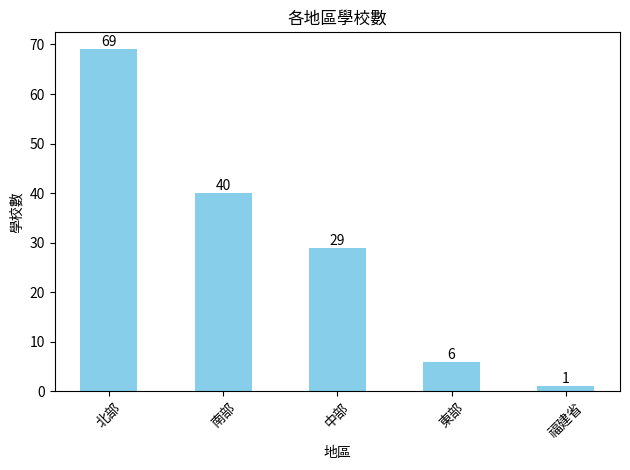

In [46]:
# 目的是根據區域（從'區域'列中取得）統計每個區域的學校數量，然後以長條圖的形式顯示。

# Line43說明，df5_1 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df5_1 中。確保每個學校代碼僅出現一次。

# Line44說明，count = df5_1['區域'].value_counts()
# 使用 value_counts() 函數計算 df5_1['區域'] 列中每個唯一值的出現次數，並將結果儲存在 count 中。

# Line45說明，listx = [count[x] for x in list(df['區域'].unique())]
# 使用列表推導式，根據原始 DataFrame df 中的唯一區域列表，拜訪該列表並從 count 字典中取得對應的學校數量，然後將結果儲存在 listx 中。

# Line46說明，listy = df['區域'].unique()
# 使用 unique() 函數取得原始 DataFrame df 中的唯一區域列表，並將結果儲存在 listy 中。

# Line48說明，plt.bar(listy, listx, width=0.5, color='skyblue')
# 使用 plt.bar() 函數繪製長條圖，其中 listy 是 x 軸上的刻度（即區域），listx 是對應的 y 軸數值（即學校數量）。
# width=0.5 設置長條的寬度為0.5。
# color='skyblue' 設置長條的顏色為天藍色。

# Line50-51說明，for i, value in enumerate(listx): plt.text(listy[i], value, str(value), ha='center', va='bottom')
# 使用 plt.text() 函數在每個長條上方添加文字標籤。listy[i] 是每個長條的 x 軸位置，value 是對應的 y 軸數值，str(value) 將數值轉換為字元串。
# ha='center' 和 va='bottom' 分別指定文字的水平對齊方式為中心和垂直對齊方式為底部。

# Line53說明，plt.title('各地區學校數')
# 設置圖表的標題為 '各地區學校數'。

# Line54說明，plt.xlabel('地區')
# 設置 x 軸的標籤為 '地區'。

# Line55說明，plt.ylabel('學校數')
# 設置 y 軸的標籤為 '學校數'。

# Line56說明，plt.xticks(rotation=45)
# 設置 x 軸刻度的旋轉角度為45度，以避免刻度標籤相互重疊。

# Line57說明，plt.tight_layout()
# 調整圖表的布局，以確保所有元素都能夠合理顯示。

# Line58說明，plt.show()
# 顯示繪製的圖形。


df5_1 = df.drop_duplicates('學校代碼')
count = df5_1['區域'].value_counts()
listx = [count[x] for x in list(df['區域'].unique())]
listy = df['區域'].unique()

plt.bar(listy, listx, width=0.5, color='skyblue')

for i, value in enumerate(listx):
    plt.text(listy[i], value, str(value), ha='center', va='bottom')

plt.title('各地區學校數')
plt.xlabel('地區')
plt.ylabel('學校數')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 各體系別分別有？所

In [47]:
# 目的是根據體系別（從'體系別'列中取得）統計每個體系別的學校數量，然後列印出來。

# Line14說明，df6 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df6 中。確保每個學校代碼僅出現一次。

# Line15說明，count = df6['體系別'].value_counts()
# 使用 value_counts() 函數計算 df6['體系別'] 列中每個唯一值的出現次數，並將結果儲存在 count 中。

# Line17說明，print(f"本資料集共收集了 {len(df6)} 所學校，其中：技職體系有 {count['2 技職']} 所；一般體系有 {count['1 一般']} 所；師範體系有 {count['3 師範']} 所。")
# 使用 f-string 格式化輸出，顯示每個體系別的學校數量。len(df6) 表示總學校數量，count['2 技職']、count['1 一般'] 和 count['3 師範'] 分別表示技職體系、一般體系和師範體系的學校數量。



df6 = df.drop_duplicates('學校代碼')
count = df6['體系別'].value_counts()

print(f"本資料集共收集了 {len(df6)} 所學校，其中：技職體系有 {count['2 技職']} 所；一般體系有 {count['1 一般']} 所；師範體系有 {count['3 師範']} 所。")

本資料集共收集了 145 所學校，其中：技職體系有 78 所；一般體系有 62 所；師範體系有 5 所。


# 7. 國立/私立與男女比
請問國立大學與私立大學在學男生女生比例為何? 延修生男生女生比例為何?

In [48]:
# 目的是建立一個多層字典結構，用於儲存每所學校的在學生和延修生的男女生數量，然後統計每所學校的男女生數量並更新字典。

# Line35說明，count = {}
# 建立一個空字典，將用於儲存學校的在學生和延修生的男女生數量。

# Line37說明，def create_count_dict(df, count):
# 定義一個函數 create_count_dict，該函數的目的是建立多層字典結構，用於儲存每所學校的男女生數量。

# Line38說明，df7 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df7 中。確保每個學校代碼僅出現一次。

# Line39說明，for i in df7['學校名稱']:
# 拜訪 df7['學校名稱'] 中的每個學校名稱。

# Line40說明，count[i] = {}
# 將學校名稱作為鍵(key)，建立一個新的空字典作為值(value)，以儲存該學校的男女生數量。

# Line41，44說明，count[i]['在學生'] = {}、count[i]['延修生'] = {}
# 在新建的學校字典中，建立兩個子字典，用於分別儲存在學生和延修生的男女生數量。

# Line42-43，45-46說明，count[i]['在學生']['男生數'] = 0、count[i]['在學生']['女生數'] = 0、count[i]['延修生']['男生數'] = 0、count[i]['延修生']['女生數'] = 0
# 初始化每所學校的男女生數量為0。

# Line49說明，def count_every_schools_data(df):
# 定義一個函數 count_every_schools_data，用於統計每所學校的男女生數量並更新字典。

# Line50說明，for j in range(len(df)):
# 使用 range(len(df)) 拜訪 DataFrame df 中的每一行。

# Line51-54說明，count[df.iloc[j,2]]['在學生']['男生數'] += ...、count[df.iloc[j,2]]['在學生']['女生數'] += ...、count[df.iloc[j,2]]['延修生']['男生數'] += ...、count[df.iloc[j,2]]['延修生']['女生數'] += ...
# 這些行根據每一行的數據更新對應學校的男女生數量。
# 例如，df.iloc[j,2] 是該行的學校名稱，count[df.iloc[j,2]] 取得該學校的字典，然後根據該行的男女生數量更新在學生和延修生的男女生數量。


count = {}

def create_count_dict(df, count): # 建立多層 dict 結構來儲存各校在學與延修生的男女生數
    df7 = df.drop_duplicates('學校代碼')
    for i in df7['學校名稱']:
        count[i] = {}
        count[i]['在學生'] = {}
        count[i]['在學生']['男生數'] = 0
        count[i]['在學生']['女生數'] = 0
        count[i]['延修生'] = {}
        count[i]['延修生']['男生數'] = 0
        count[i]['延修生']['女生數'] = 0


def count_every_schools_data(df):
    for j in range(len(df)):
        count[df.iloc[j,2]]['在學生']['男生數'] += (int(df.iloc[j,8]) + int(df.iloc[j,10]) + int(df.iloc[j,12]) + int(df.iloc[j,14]) + int(df.iloc[j,16]) + int(df.iloc[j,18]) + int(df.iloc[j,20]))
        count[df.iloc[j,2]]['在學生']['女生數'] += (int(df.iloc[j,9]) + int(df.iloc[j,11]) + int(df.iloc[j,13]) + int(df.iloc[j,15]) + int(df.iloc[j,17]) + int(df.iloc[j,19]) + int(df.iloc[j,21]))
        count[df.iloc[j,2]]['延修生']['男生數'] += int(df.iloc[j,22])
        count[df.iloc[j,2]]['延修生']['女生數'] += int(df.iloc[j,23])

create_count_dict(df, count) # 執行Line37定義的Function
count_every_schools_data(df) # 執行Line49定義的Function


In [49]:
# 目的是根據公私立屬性，分別計算國立與私立大學在學生和延修生的男女比例，然後列印出來。

# Line35-36說明，public_current_male = 0 和 public_current_female = 0
# 定義兩個變量 public_current_male 和 public_current_female，分別用於儲存男女生數量的加總，初始值為0。

# Line38說明，df7_1 = df.drop_duplicates('學校代碼', ignore_index=True)
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果存儲在 DataFrame df7_1 中。 ignore_index=True 會重新編制索引，以便在後續循環中可以正確地訪問行。

# Line39說明，for i in range(len(df7_1)):
# 通過迴圈拜訪 DataFrame df7_1 中的每一行。

# Line40說明，if df7_1.loc[i,'公私立'] == '國立':
# 檢查每所學校的公私立屬性是否為國立。

# Line41-42說明，public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數'] 和 public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']
# 將符合條件的國立大學的在學生男女生數量加入到 public_current_male 和 public_current_female 中。

# Line44說明，ratio = public_current_male/public_current_female*100
# 計算男女比例，將男生數除以女生數，並乘以100獲得百分比。

# Line45說明，print(f'國立大學在學生男女比：{ratio} ≑ {round(ratio,2)}')
# 使用 f-string 格式化輸出，印出國立大學在學生的男女比例，並使用 round() 函數四捨五入至小數點後兩位。

# Line47，56，65說明，df7_2 = df.drop_duplicates('學校代碼', ignore_index=True)、df7_3 = df.drop_duplicates('學校代碼', ignore_index=True) 和 df7_4 = df.drop_duplicates('學校代碼', ignore_index=True)
# 這三行與上述第一行類似，分別建立了三個新的 DataFrame，用於下面的私立大學在學生男女比例和國立、私立大學延修生男女比例的計算。

# Line49，58，67說明，if df7_2.loc[i,'公私立'] == '私立':、if df7_3.loc[i,'公私立'] == '國立': 和 if df7_4.loc[i,'公私立'] == '私立':
# 這三行用於檢查每所學校的公私立屬性是否分別為私立和國立。

# Line53-54說明，ratio = public_current_male/public_current_female*100 和 print(f'私立大學在學生男女比：{ratio} ≑ {round(ratio,2)}')
# 這兩行用於計算私立大學在學生的男女比例，並列印出來，與前面的國立大學類似。



public_current_male = 0
public_current_female = 0

df7_1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_1)):
    if df7_1.loc[i,'公私立'] == '公立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_2 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_2)):
    if df7_2.loc[i,'公私立'] == '私立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'私立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_3 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_3)):
    if df7_3.loc[i,'公私立'] == '國立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['延修生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_4 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_4)):
    if df7_4.loc[i,'公私立'] == '私立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['延修生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'私立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

國立大學在學生男女比：119.10964038427396 ≑ 119.11
私立大學在學生男女比：96.44547804394217 ≑ 96.45
國立大學延修生男女比：96.44547804394217 ≑ 96.45
私立大學延修生男女比：97.30984726379614 ≑ 97.31


# 8. 國立大學在學生男女比

In [50]:
public_current_male = 0
public_current_female = 0

df7_1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_1)):
    if df7_1.loc[i,'公私立'] == '公立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

國立大學在學生男女比：119.10964038427396 ≑ 119.11


 # 9. 每校平均最多與最少人的體系

In [17]:
# 目的是計算每個體系別（例如技職、一般、師範等）的平均每校學生人數，並找出平均人數最多和最少的體系別。

# Line46說明，df8 = df.drop_duplicates('學校代碼')
# 使用 drop_duplicates() 函數根據 '學校代碼' 列刪除重複的行，並將結果儲存在 DataFrame df8 中。確保每個學校代碼僅出現一次。

# Line47說明，system_count = df8['體系別'].value_counts()
# 使用 value_counts() 函數計算 df8['體系別'] 列中每個唯一值的出現次數，並將結果儲存在 system_count 中。這將統計每個體系別的學校數量。

# Line49說明，system_list = list(df['體系別'].unique())
# 使用 unique() 函數獲取原始 DataFrame df 中的唯一體系別列表，並將結果轉換為列表儲存在 system_list 中。

# Line50說明，count_student = 0
# 初始化一個變量 count_student，用於計算每個體系別的學生總數。

# Line51說明，result_dict = {}
# 建立一個空字典 result_dict，用於儲存每個體系別的平均每校學生人數。

# Line53說明，for system in system_list:
# 拜訪 system_list 中的每個體系別。

# Line54說明，for i in range(len(df)):
# 使用 range(len(df)) 拜訪 DataFrame df 中的每一行。

# Line55說明，if df.loc[i,'體系別'] == system:
# 檢查當前行的體系別是否等於當前迭代的體系別。

# Line56說明，count_student += int(df.loc[i, '總計'])
# 將當前行的學生總數加到 count_student 變量中。

# Line57說明，result_dict[system[2:]] = count_student/system_count[system]
# 計算當前體系別的平均每校學生人數，並將結果儲存在 result_dict 字典中。由於體系別中包含了一個編碼（例如 '1 一般'），使用 system[2:] 來取得體系別的可讀部分。

# Line58說明，count_student = 0
# 將 count_student 變量重置為0，以準備計算下一個體系別的學生總數。

# Line60-61說明，max_value = max(result_dict.values())、min_value = min(result_dict.values())
# 找出 result_dict 字典中的最大值和最小值，分別代表最多人和最少人的平均每校學生人數。

# Line62-63說明，max_key = next(key for key, value in result_dict.items() if value == max_value)、min_key = next(key for key, value in result_dict.items() if value == min_value)
# 找出 result_dict 字典中最大值和最小值對應的鍵（即體系別）。

# Line64-65說明，print(f"每校平均最多人的是{max_key}體系，平均每校 {round(max_value,2)} 人；")、print(f"每校平均最少人的是{min_key}體系，平均每校 {round(min_value,2)} 人。")
# 使用 f-string 格式化輸出，顯示最多人和最少人的平均每校學生人數，以及對應的體系別。


df8 = df.drop_duplicates('學校代碼')
system_count = df8['體系別'].value_counts()

system_list = list(df['體系別'].unique())
count_student = 0
result_dict = {}

for system in system_list:
    for i in range(len(df)):
        if df.loc[i,'體系別'] == system:
            count_student += int(df.loc[i, '總計'])
    result_dict[system[2:]] = count_student/system_count[system]
    count_student = 0

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"每校平均最多人的是{max_key}體系，平均每校 {round(max_value,2)} 人；")
print(f"每校平均最少人的是{min_key}體系，平均每校 {round(min_value,2)} 人。")

每校平均最多人的是一般體系，平均每校 9224.89 人；
每校平均最少人的是技職體系，平均每校 6143.56 人。


# 10. 將新增的欄位寫入並儲存成新的CSV檔案，並命名為112_students_tf.csv

新增的欄位有"公私立"，"縣市名"，"區域"

In [37]:
df.head(2)
df.to_csv('112_students_tf.csv', encoding='utf-8', sep=',')